<a href="https://colab.research.google.com/github/aravind2225/CognoRise-InfoTech/blob/main/CustomerTravelChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
#Importing the libraries and reading reading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/content/Cust_churn.csv')
data

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [232]:
print(data.info())
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB
None
(954, 7)
6678


In [233]:
data.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [234]:
data.isnull().sum()

,0
Age,0
FrequentFlyer,0
AnnualIncomeClass,0
ServicesOpted,0
AccountSyncedToSocialMedia,0
BookedHotelOrNot,0
Target,0


<Axes: ylabel='Frequency'>

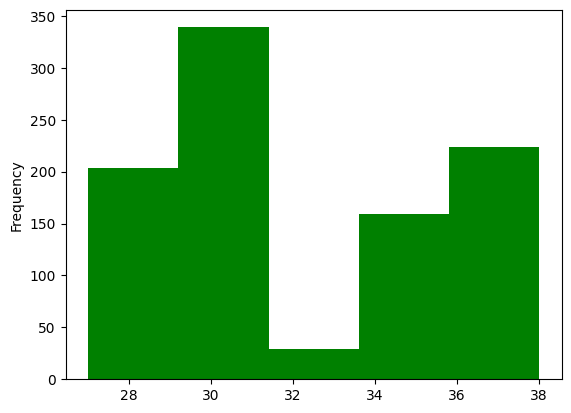

In [235]:
data['Age'].plot(kind='hist',color='g',bins=5)

In [236]:
data['Age'].mean()

32.109014675052414

In [237]:
data['FrequentFlyer'].value_counts()

,count
FrequentFlyer,
No,608
Yes,286
No Record,60


In [238]:
data['AnnualIncomeClass'].value_counts()

,count
AnnualIncomeClass,
Middle Income,409
Low Income,386
High Income,159


In [239]:
#lets see if there are any low income people who travelrs frequently
data[data['AnnualIncomeClass']=='Low Income']['FrequentFlyer'].value_counts()

,count
FrequentFlyer,
No,237
Yes,127
No Record,22


In [240]:
#now we are retreving the number of travellers who opted more than 3 services
data[data['ServicesOpted']>3].head(20)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
6,34,No,Middle Income,4,Yes,Yes,0
13,34,Yes,Low Income,4,No,No,0
14,34,No,Middle Income,5,No,No,0
15,37,Yes,Low Income,6,No,Yes,0
20,30,No,Middle Income,4,No,Yes,0
27,30,No,Middle Income,5,Yes,No,0
30,33,No,Middle Income,6,No,Yes,0
34,30,No Record,Low Income,4,No,No,0


In [241]:
#Average servies opted by a person
round(data['ServicesOpted'].mean(),1)

2.4

In [242]:
#now we are looking at how many travellers account synced to social media and how many customers are booked hotel
print(data['AccountSyncedToSocialMedia'].value_counts())
print(data['BookedHotelOrNot'].value_counts())

AccountSyncedToSocialMedia
No     594
Yes    360
Name: count, dtype: int64
BookedHotelOrNot
No     576
Yes    378
Name: count, dtype: int64


In [243]:
#Retreving if there are any customers with age 35+ and their account synced with social media or not
data[data['Age']>35]['AccountSyncedToSocialMedia'].value_counts()

,count
AccountSyncedToSocialMedia,
No,146
Yes,78


In [244]:
#Retreving if there are customers with age less than 30
data[data['Age']<30]['BookedHotelOrNot'].value_counts()

,count
BookedHotelOrNot,
No,130
Yes,73


In [245]:
data[['FrequentFlyer','BookedHotelOrNot']].value_counts()

FrequentFlyer  BookedHotelOrNot
No             No                  328
               Yes                 280
Yes            No                  214
               Yes                  72
No Record      No                   34
               Yes                  26
Name: count, dtype: int64

In [246]:
#Now we should retreive the average servies opted by each family class
data.groupby('AnnualIncomeClass')['ServicesOpted'].mean().round(1)

,ServicesOpted
AnnualIncomeClass,
High Income,2.1
Low Income,2.0
Middle Income,2.9


<Axes: xlabel='AnnualIncomeClass'>

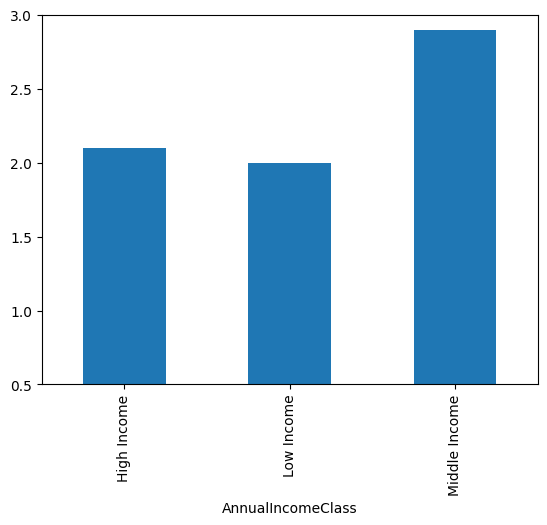

In [247]:
data.groupby('AnnualIncomeClass')['ServicesOpted'].mean().round(1).plot(kind='bar',ylim=(0.5,3),width=0.5)

In [248]:
#The average of the age of customers who both booked hotel and account linked with social media
data[(data['AccountSyncedToSocialMedia']=='Yes') & (data['BookedHotelOrNot']=='Yes')]['Age'].mean().round(1)

32.0

In [249]:
#Now we are retreving churn info about the customers who are not frequent flyers
data[data['FrequentFlyer']=='No']['Target'].value_counts()
#So only 69 customers who are not freqnet flyers are churned

,count
Target,
0,539
1,69


In [250]:
#Now we are retreving churn info about the customers who are frequent flyers
data[data['FrequentFlyer']=='Yes']['Target'].value_counts()
#So only 9 customers who are not freqnet flyers are churned
# there are almost equal no.of customers who are frequent customers who are churned

,count
Target,
1,147
0,139


In [251]:
#Now we should try to find the most commmon properties among the churned customers
data[data['Target']==1].AnnualIncomeClass.value_counts()

,count
AnnualIncomeClass,
Low Income,104
High Income,92
Middle Income,28


In [252]:
#Now we should try to find the most commmon properties among the churned customers
data[data['Target']==1].Age.value_counts()

,count
Age,
28,40
27,35
30,34
37,27
34,20
36,16
31,15
35,13
29,13


In [253]:
#Now we should try to find the most commmon properties among the churned customers
data[data['Target']==1].BookedHotelOrNot.value_counts()

,count
BookedHotelOrNot,
No,176
Yes,48


In [254]:
#Now we should try to find the most commmon properties among the churned customers
data[data['Target']==1].AccountSyncedToSocialMedia.value_counts()

,count
AccountSyncedToSocialMedia,
No,125
Yes,99


In [255]:
#Now we are going into final step that is building predictive modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [256]:
#Scaling the numeric data and converting the categorical data into numerics
lab_enc=LabelEncoder()
scale=StandardScaler()
data['Age']=scale.fit_transform(data[['Age']])
data['ServicesOpted']=scale.fit_transform(data[['ServicesOpted']])
data['AnnualIncomeClass']=lab_enc.fit_transform(data['AnnualIncomeClass'])
data['FrequentFlyer']=lab_enc.fit_transform(data['FrequentFlyer'])
data['AccountSyncedToSocialMedia']=lab_enc.fit_transform(data['AccountSyncedToSocialMedia'])
data['BookedHotelOrNot']=lab_enc.fit_transform(data['BookedHotelOrNot'])

#Segregating the values
x=data.drop(columns=['Target'])
y=data['Target']

In [257]:
#testing and training of variables
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [258]:
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [259]:
y_pred=model.predict(x_test)
print(y_pred)
print(y_test)

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0]
199    1
422    0
695    0
751    0
388    0
      ..
33     1
31     0
712    0
321    1
462    0
Name: Target, Length: 191, dtype: int64


In [260]:
#predicting for new induvidual data
new_data = pd.DataFrame({
    'Age': [28],
    'FrequentFlyer': ['No'],
    'AnnualIncomeClass': ['Low Income'],
    'ServicesOpted': [6],
    'AccountSyncedToSocialMedia': ['No'],
    'BookedHotelOrNot': ['No']
})
new_data['Age']=scale.fit_transform(new_data[['Age']])
new_data['ServicesOpted']=scale.fit_transform(new_data[['ServicesOpted']])
new_data['AnnualIncomeClass']=lab_enc.fit_transform(new_data['AnnualIncomeClass'])
new_data['FrequentFlyer']=lab_enc.fit_transform(new_data['FrequentFlyer'])
new_data['AccountSyncedToSocialMedia']=lab_enc.fit_transform(new_data['AccountSyncedToSocialMedia'])
new_data['BookedHotelOrNot']=lab_enc.fit_transform(new_data['BookedHotelOrNot'])


model.predict(new_data)

array([0])

In [261]:
#accuracy testing
accuracy_score(y_test,y_pred)*100

87.95811518324608